<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/AGC27_2_0_1_stats_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#License: GPL 
#Creator: Mike Smith https://github.com/gomlfx 
#designed for colab/kaggle/Jupyter

In [2]:
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing 

In [3]:
#metatrader5 file format
df=pd.read_table('/content/GBPUSD_Daily_199305120000_202205130000.csv')

In [4]:
print(df.head())
print(df.tail())
df.info()

       <DATE>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  <TICKVOL>  <VOL>  <SPREAD>
0  1993.05.12  1.5370  1.5445  1.5290   1.5338       2781      0        50
1  1993.05.13  1.5328  1.5360  1.5180   1.5225       2571      0        50
2  1993.05.14  1.5228  1.5415  1.5200   1.5387       2711      0        50
3  1993.05.17  1.5365  1.5460  1.5309   1.5355       2921      0        50
4  1993.05.18  1.5350  1.5380  1.5237   1.5365       2711      0        50
          <DATE>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <VOL>  \
7537  2022.05.09  1.23475  1.24062  1.22607  1.23288     132787      0   
7538  2022.05.10  1.23290  1.23760  1.22913  1.23145     141136      0   
7539  2022.05.11  1.23120  1.24002  1.22374  1.22427     141912      0   
7540  2022.05.12  1.22463  1.22515  1.21648  1.21961     162435      0   
7541  2022.05.13  1.21963  1.22141  1.21921  1.22116       6416      0   

      <SPREAD>  
7537         0  
7538         0  
7539         0  
7540         0  
7541         0  
<cl

In [5]:
df

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,1993.05.12,1.53700,1.54450,1.52900,1.53380,2781,0,50
1,1993.05.13,1.53280,1.53600,1.51800,1.52250,2571,0,50
2,1993.05.14,1.52280,1.54150,1.52000,1.53870,2711,0,50
3,1993.05.17,1.53650,1.54600,1.53090,1.53550,2921,0,50
4,1993.05.18,1.53500,1.53800,1.52370,1.53650,2711,0,50
...,...,...,...,...,...,...,...,...
7537,2022.05.09,1.23475,1.24062,1.22607,1.23288,132787,0,0
7538,2022.05.10,1.23290,1.23760,1.22913,1.23145,141136,0,0
7539,2022.05.11,1.23120,1.24002,1.22374,1.22427,141912,0,0
7540,2022.05.12,1.22463,1.22515,1.21648,1.21961,162435,0,0


In [6]:
d = df[["<OPEN>","<HIGH>","<LOW>","<CLOSE>"]]
df = pd.DataFrame(data=d)
df

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,1.53700,1.54450,1.52900,1.53380
1,1.53280,1.53600,1.51800,1.52250
2,1.52280,1.54150,1.52000,1.53870
3,1.53650,1.54600,1.53090,1.53550
4,1.53500,1.53800,1.52370,1.53650
...,...,...,...,...
7537,1.23475,1.24062,1.22607,1.23288
7538,1.23290,1.23760,1.22913,1.23145
7539,1.23120,1.24002,1.22374,1.22427
7540,1.22463,1.22515,1.21648,1.21961


In [7]:
df_raw1 = pd.DataFrame(data=df)
df_raw1

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,1.53700,1.54450,1.52900,1.53380
1,1.53280,1.53600,1.51800,1.52250
2,1.52280,1.54150,1.52000,1.53870
3,1.53650,1.54600,1.53090,1.53550
4,1.53500,1.53800,1.52370,1.53650
...,...,...,...,...
7537,1.23475,1.24062,1.22607,1.23288
7538,1.23290,1.23760,1.22913,1.23145
7539,1.23120,1.24002,1.22374,1.22427
7540,1.22463,1.22515,1.21648,1.21961


In [8]:
stop_df = pd.DataFrame(data=df.tail(40))  
stop_df.iloc[:-1] 
stop_df1 = stop_df[stop_df['<OPEN>'] > stop_df['<CLOSE>']]
print(stop_df1)

stop_df2 = stop_df[stop_df['<OPEN>'] < stop_df['<CLOSE>']]
print(stop_df2)


       <OPEN>   <HIGH>    <LOW>  <CLOSE>
7502  1.31690  1.32101  1.31269  1.31642
7504  1.32577  1.32986  1.31753  1.32023
7505  1.32018  1.32141  1.31570  1.31825
7507  1.31706  1.31839  1.30668  1.30896
7511  1.31325  1.31506  1.30863  1.31108
7513  1.31120  1.31666  1.30668  1.30724
7514  1.30723  1.31080  1.30452  1.30672
7516  1.30745  1.30851  1.29821  1.30330
7518  1.30277  1.30538  1.29938  1.29995
7520  1.31151  1.31474  1.30332  1.30753
7521  1.30716  1.30766  1.30461  1.30606
7522  1.30445  1.30635  1.30049  1.30133
7523  1.30071  1.30408  1.29806  1.29969
7525  1.30668  1.30903  1.30225  1.30292
7526  1.30277  1.30349  1.28231  1.28379
7527  1.28332  1.28428  1.26975  1.27393
7528  1.27372  1.27724  1.25707  1.25733
7529  1.25715  1.26020  1.25027  1.25441
7530  1.25396  1.25702  1.24113  1.24574
7532  1.25774  1.25968  1.24730  1.24898
7535  1.26260  1.26345  1.23251  1.23617
7536  1.23616  1.23801  1.22757  1.23352
7537  1.23475  1.24062  1.22607  1.23288
7538  1.23290  1

In [9]:

stop_df1['stop_for_sell'] = stop_df1['<HIGH>'] - stop_df1['<OPEN>']
print(stop_df1.stop_for_sell)

stop_df2['stop_for_buy'] = stop_df2['<OPEN>'] - stop_df2['<LOW>']
print(stop_df2.stop_for_buy)

7502    0.00411
7504    0.00409
7505    0.00123
7507    0.00133
7511    0.00181
7513    0.00546
7514    0.00357
7516    0.00106
7518    0.00261
7520    0.00323
7521    0.00050
7522    0.00190
7523    0.00337
7525    0.00235
7526    0.00072
7527    0.00096
7528    0.00352
7529    0.00305
7530    0.00306
7532    0.00194
7535    0.00085
7536    0.00185
7537    0.00587
7538    0.00470
7539    0.00882
7540    0.00052
Name: stop_for_sell, dtype: float64
7503    0.00431
7506    0.00211
7508    0.00378
7509    0.00048
7510    0.00258
7512    0.00000
7515    0.00166
7517    0.00339
7519    0.00263
7524    0.00065
7531    0.00178
7533    0.00193
7534    0.00469
7541    0.00042
Name: stop_for_buy, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


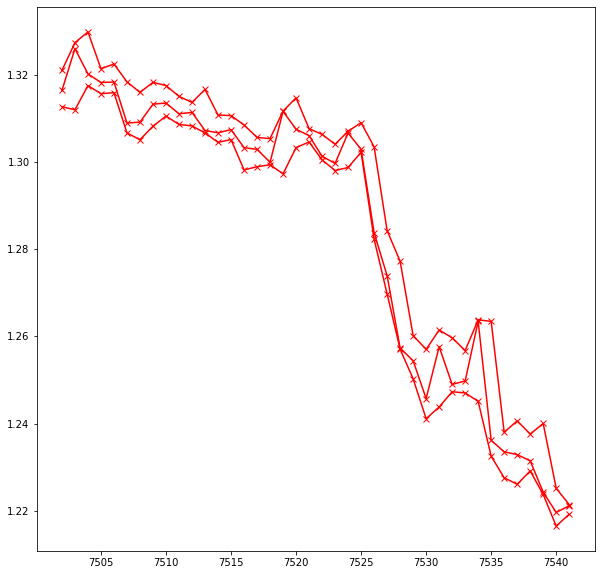

In [16]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
#include actual high and low range
line1_h = plt.plot(stop_df['<HIGH>'], label = 'actual high', marker='x', color='r')
line1_l = plt.plot(stop_df['<LOW>'], label = 'actual low', marker='x', color='r')
line1_c = plt.plot(stop_df['<CLOSE>'], label = 'actual close', marker='x', color='r')

In [10]:
print(stop_df1.stop_for_sell.describe(percentiles=[.25,.5,.75,.9,.95,.99]))
print(stop_df2.stop_for_buy.describe(percentiles=[.25,.5,.75,.9,.95,.99]))

count    26.000000
mean      0.002788
std       0.001947
min       0.000500
25%       0.001255
50%       0.002480
75%       0.003558
90%       0.005080
95%       0.005768
99%       0.008082
max       0.008820
Name: stop_for_sell, dtype: float64
count    14.000000
mean      0.002172
std       0.001488
min       0.000000
25%       0.000903
50%       0.002020
75%       0.003200
90%       0.004151
95%       0.004443
99%       0.004641
max       0.004690
Name: stop_for_buy, dtype: float64


In [11]:
stop_for_sell = stop_df1.stop_for_sell.describe()
stop_for_buy = stop_df2.stop_for_buy.describe()
 